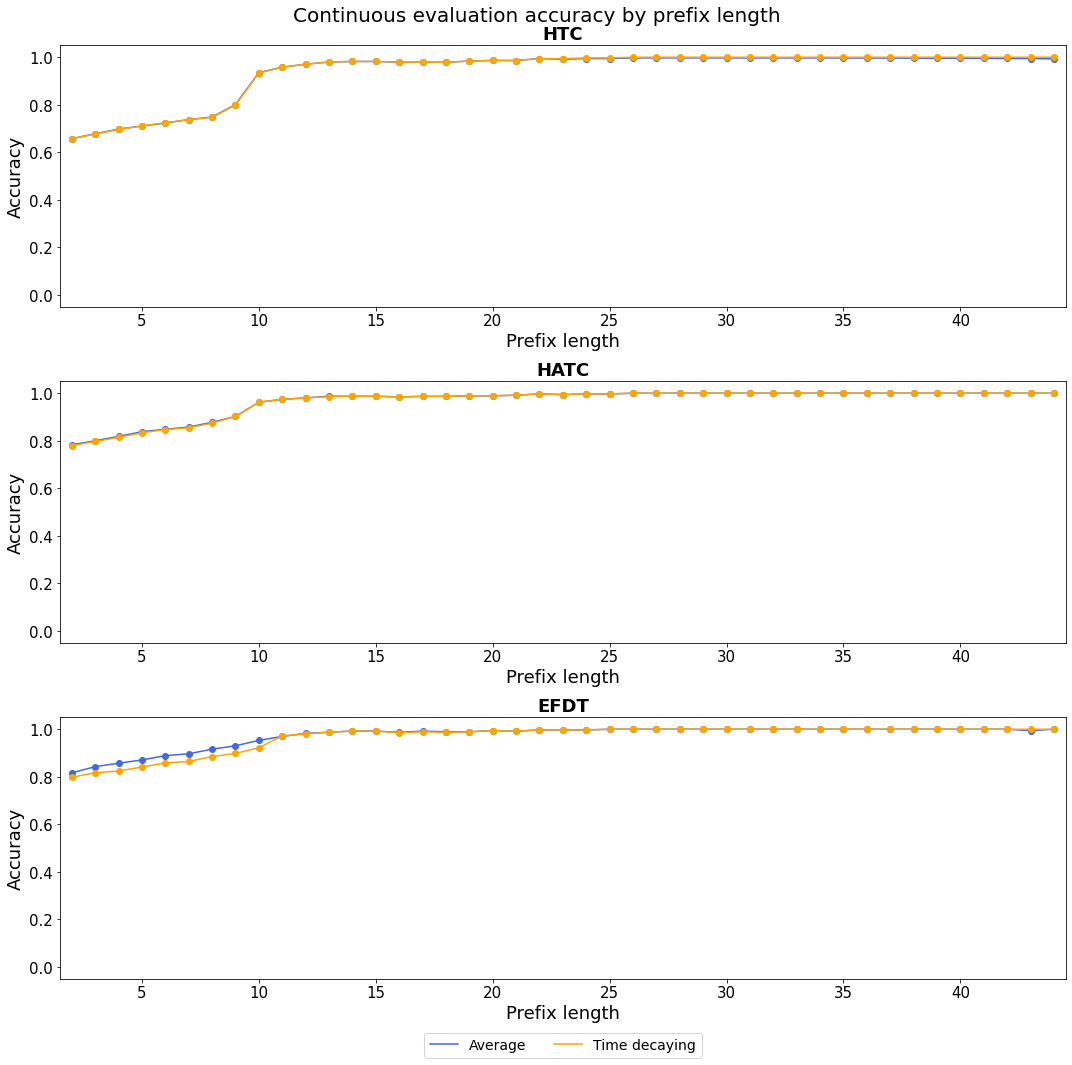

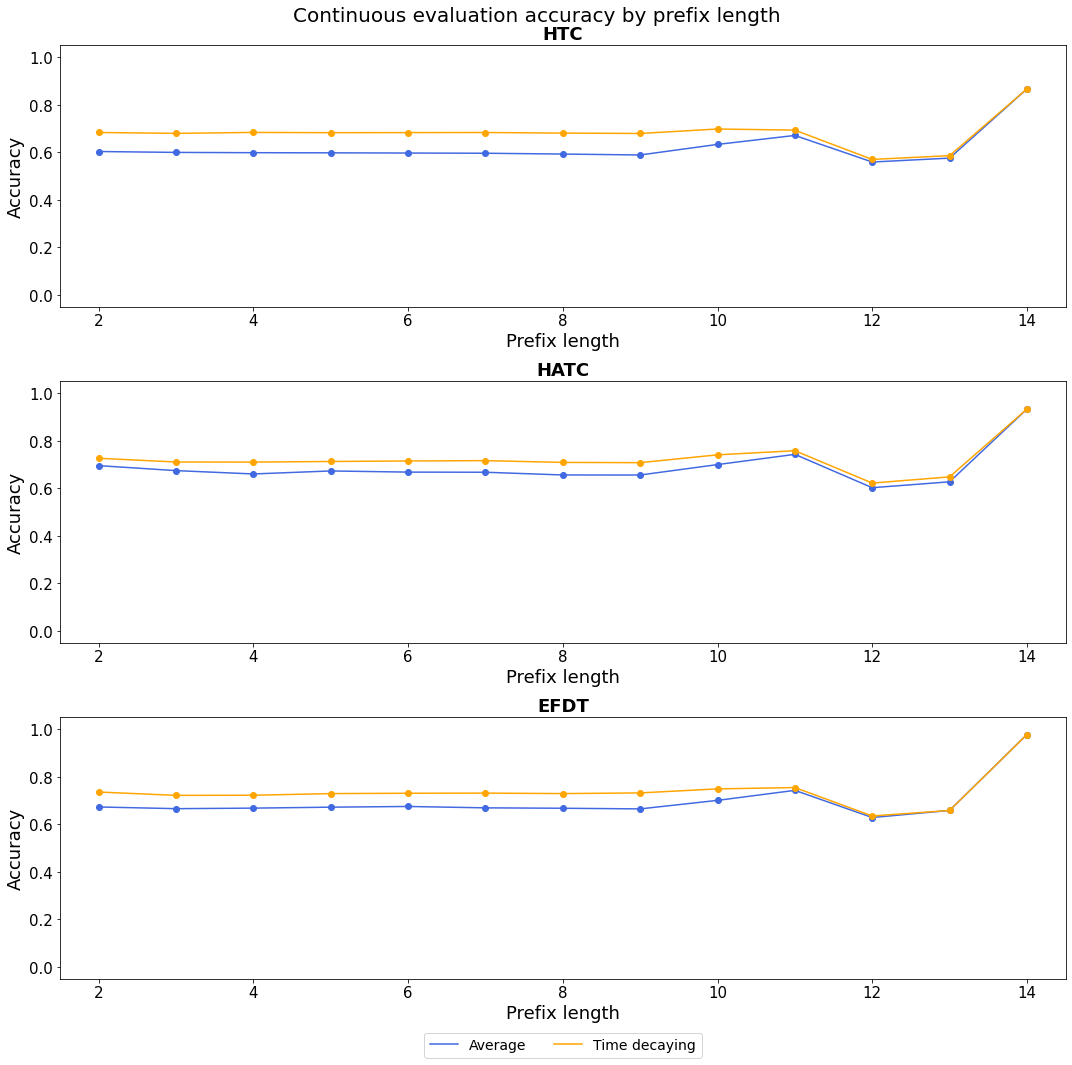

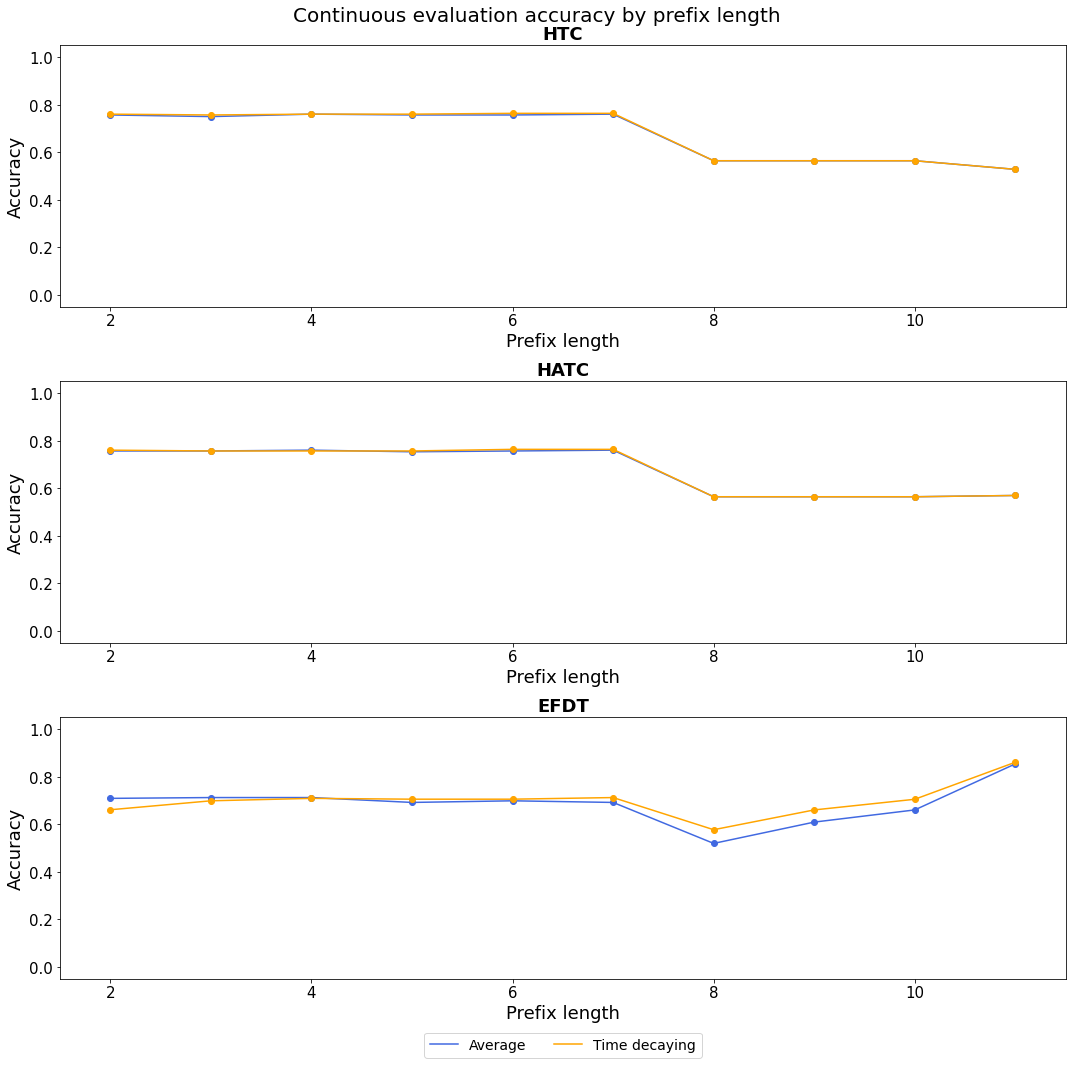

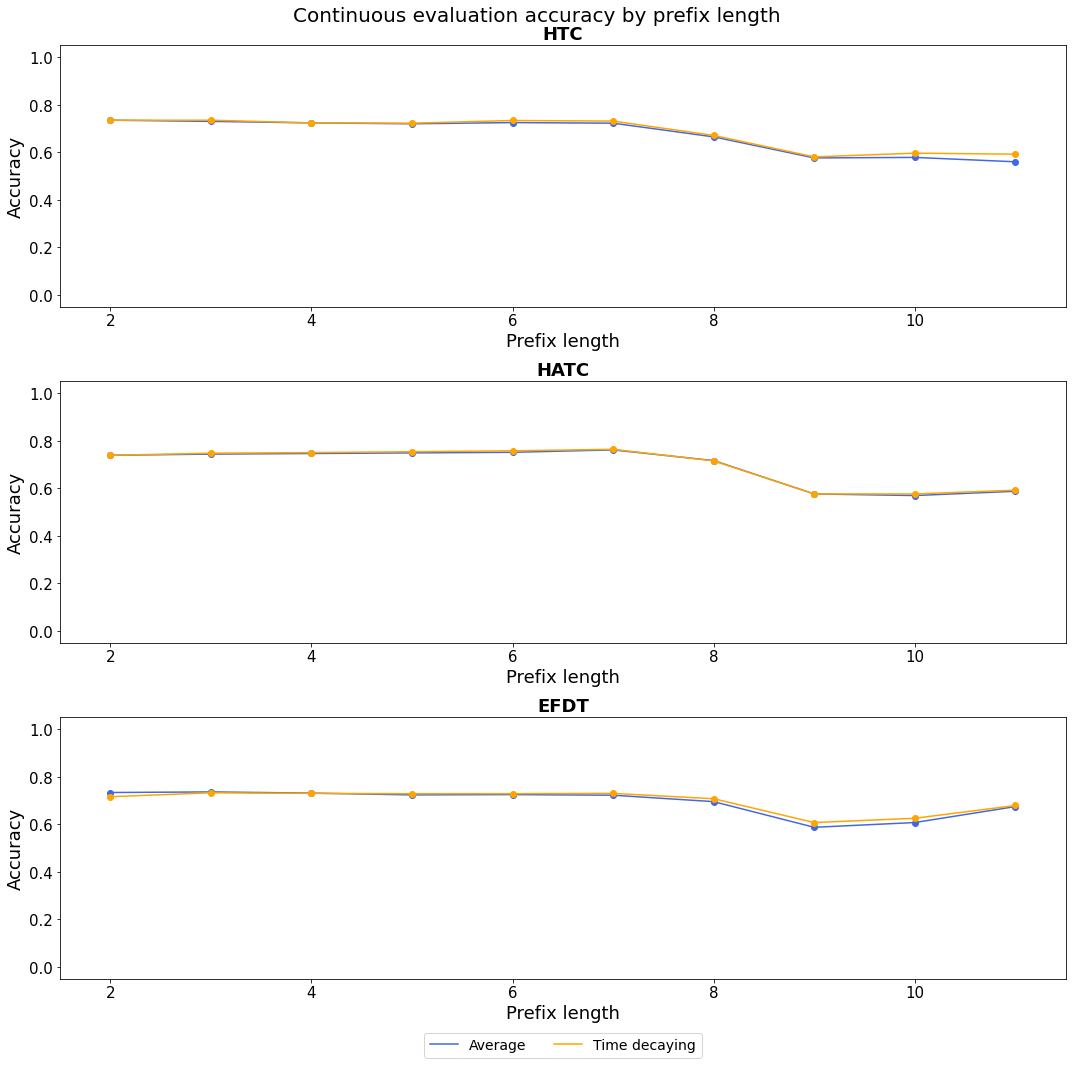

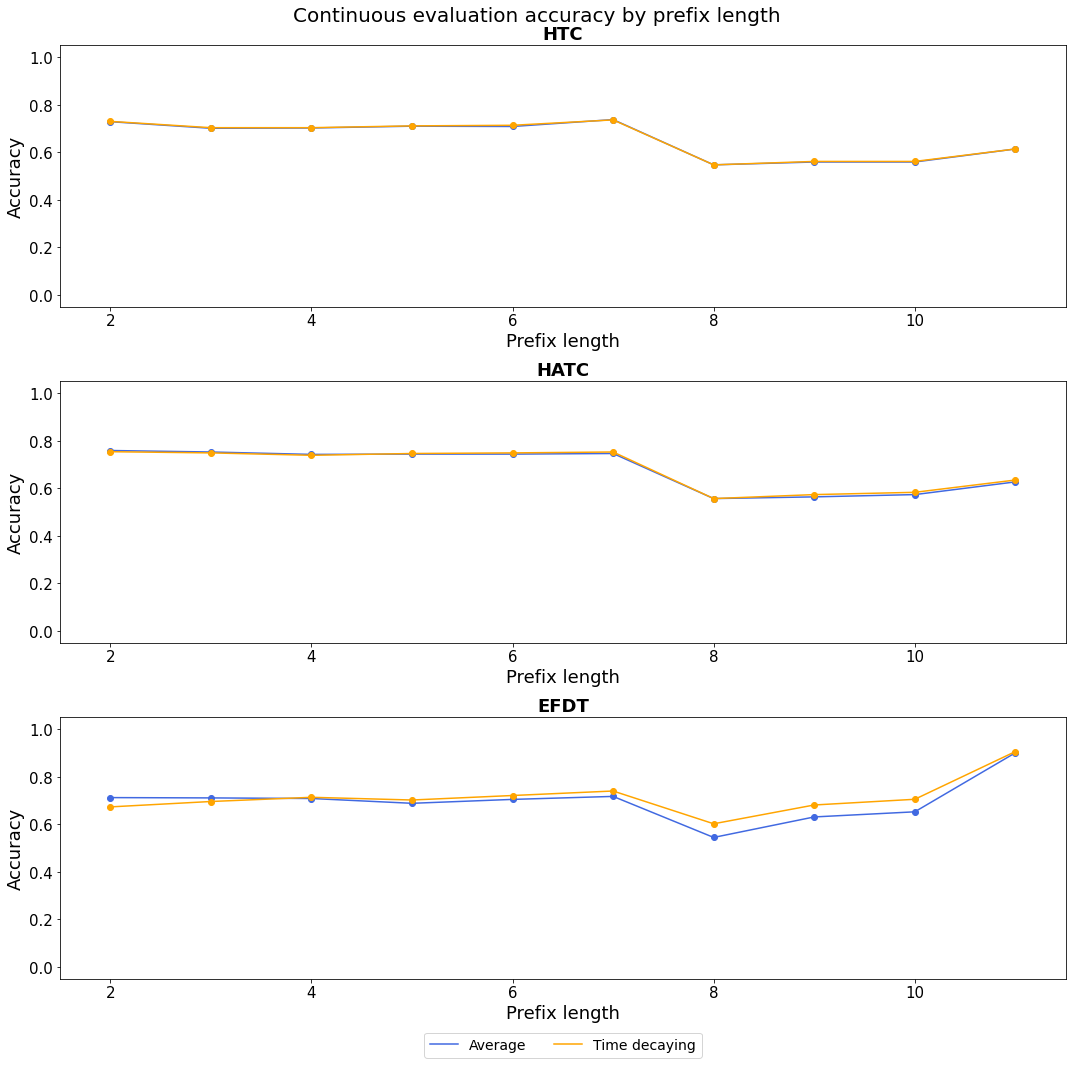

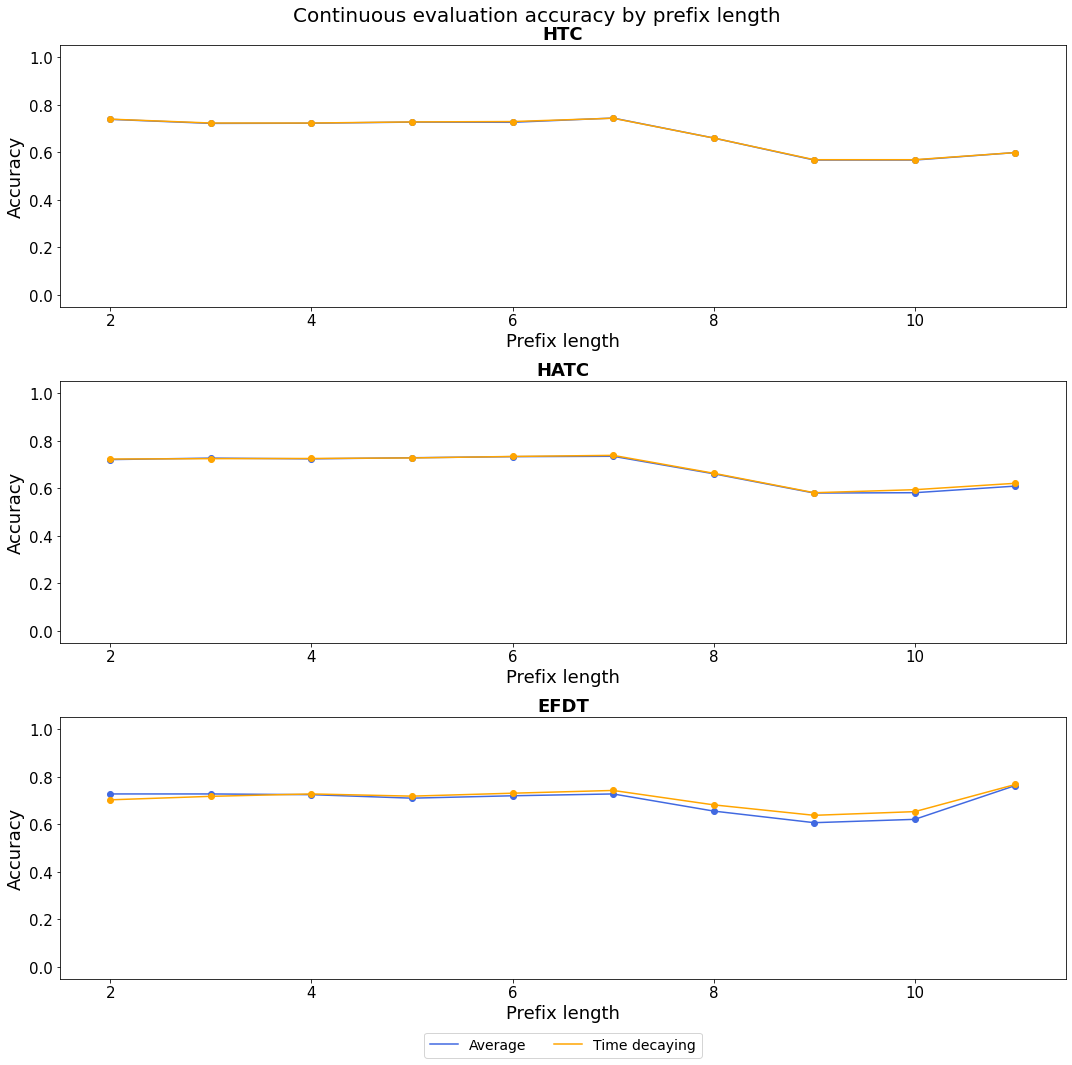

In [5]:
import matplotlib.pyplot as plt
import pickle as pkl
from matplotlib.lines import Line2D

# Continuous evaluation by prefix length




dataset_labelli = ['bpic15','bpic17','synthetic_log_b','synthetic_log_bc2','synthetic_log_bc1','synthetic_log_bc1c2']
classifier_list = ['htc','hatc','efdt']

for dataset_label in dataset_labelli:
    fig,axs = plt.subplots(3,1, figsize=(15,15))
    plt.rc('axes', titlesize=18) # fontsize of the axes title 
    plt.rc('axes', labelsize=18) # fontsize of the x and y labels 
    plt.rc('xtick', labelsize=15) # fontsize of the tick labels 
    plt.rc('ytick', labelsize=15) # fontsize of the tick labels 
    plt.rc('legend', fontsize=14) # legend fontsize 

    for pos, classifier in enumerate(classifier_list):
        with open('./result/%s/%s_continuous_evaluation_plbin_average.pkl'%(dataset_label,classifier),'rb') as f:
            x_avg,ce_acc_avg_y = pkl.load(f)
            x_avg = [int(x) for x in x_avg]

        with open('./result/%s/%s_continuous_evaluation_plbin_time.pkl'%(dataset_label,classifier),'rb') as f:
            x_time,ce_acc_time_y = pkl.load(f)
            x_time = [int(x) for x in x_time]

        axs[pos].plot(x_avg,ce_acc_avg_y,'-o', color='royalblue')
        axs[pos].plot(x_time,ce_acc_time_y,'-o', color='orange')
        axs[pos].set_title(classifier.upper(), fontweight='bold')
        axs[pos].set_ylabel('Accuracy')
        axs[pos].set_xlabel('Prefix length')
        axs[pos].set_ylim([-0.05, 1.05])
        axs[pos].set_xlim([min(x_time)-0.5, max(x_time)+0.5])

    line1 = Line2D([0], [0], label='Average', color='royalblue')
    line2 = Line2D([0], [0], label='Time decaying', color='orange')

    fig.suptitle('Continuous evaluation accuracy by prefix length', fontsize=20)
    handles, labels = plt.gca().get_legend_handles_labels()

    handles.extend([line1,line2])

    plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=2)
    fig.tight_layout()
    fig.savefig('./img/%s/continuous_evaluation_plbin.png'%(dataset_label),dpi=200)